In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data**

In [2]:
df = pd.read_csv('Ames_Housing_Data.csv')

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df = df.drop(['PID','MS SubClass','Lot Frontage','Lot Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','2nd Flr SF','Low Qual Fin SF','Bsmt Full Bath','Bsmt Half Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','Enclosed Porch','Open Porch SF','3Ssn Porch','Screen Porch','Pool Area','Misc Val','Mo Sold','Yr Sold','Wood Deck SF','Overall Cond'],axis=1)

In [5]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


In [6]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

**Removing Outliers**

Feature : Masonry veneer area in square feet

In [7]:
df[(df['Mas Vnr Area']>1500) & (df['SalePrice']<300000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
1849,FV,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,576.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,239000


In [8]:
df[(df['Mas Vnr Area']>1500) & (df['SalePrice']<300000)].index

Int64Index([1849], dtype='int64')

In [9]:
df[(df['Mas Vnr Area']<10) & (df['SalePrice']>700000)].index

Int64Index([1760], dtype='int64')

In [10]:
df[(df['Mas Vnr Area']>1100) & (df['SalePrice']>550000)].index

Int64Index([1767, 2445], dtype='int64')

In [11]:
df.drop([1849,1760,1767,2445],axis=0,inplace=True)

<AxesSubplot:xlabel='Mas Vnr Area', ylabel='SalePrice'>

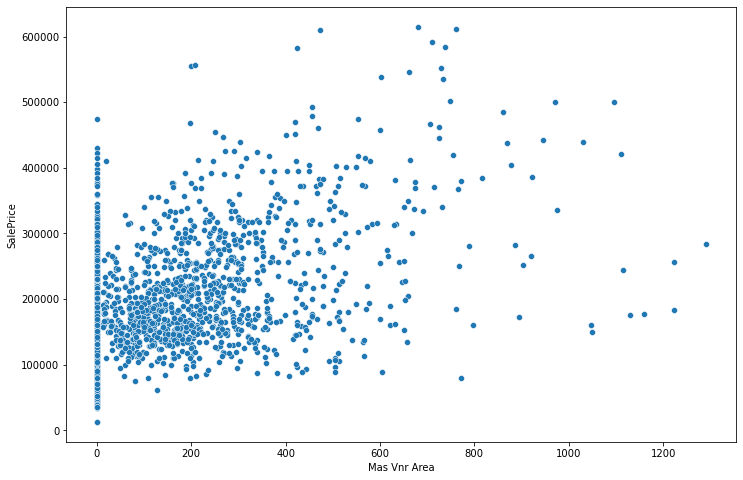

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Mas Vnr Area',y='SalePrice',data=df)

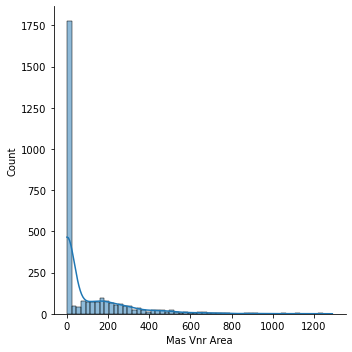

In [13]:
sns.displot(data=df,x='Mas Vnr Area',kde=True)

<AxesSubplot:xlabel='Mas Vnr Area'>

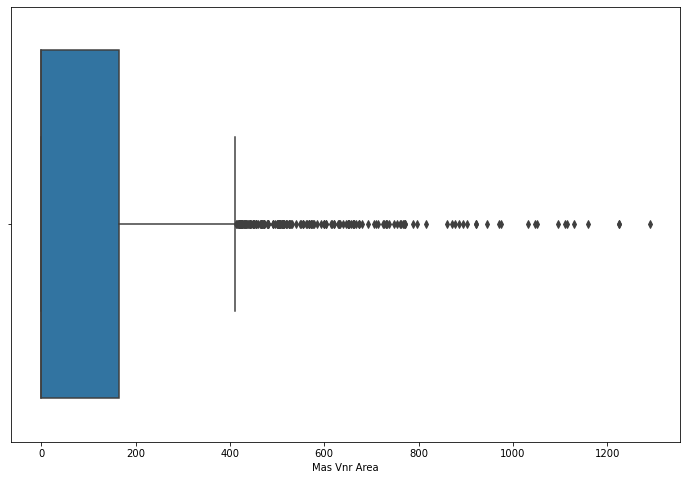

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Mas Vnr Area',whis=1.5,data=df)

In [15]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


Feature : Total Basement in square feet

In [16]:
df[(df['Total Bsmt SF']>3000) & (df['SalePrice']<300000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
444,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,880.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,284000
1498,RL,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,...,1418.0,TA,TA,Y,Gd,NaN,NaN,New,Partial,160000
2180,RL,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,...,1154.0,TA,TA,Y,NaN,NaN,Elev,New,Partial,183850
2181,RL,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,...,884.0,TA,TA,Y,NaN,NaN,NaN,New,Partial,184750


In [17]:
df[(df['Total Bsmt SF']>3000) & (df['SalePrice']<300000)].index

Int64Index([444, 1498, 2180, 2181], dtype='int64')

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

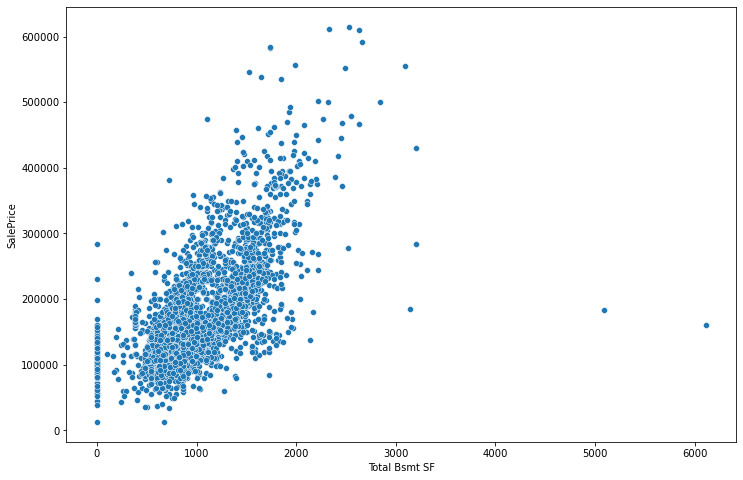

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Total Bsmt SF',y='SalePrice',data=df)

In [19]:
df.drop([444,1498,2180,2181],axis=0,inplace=True)

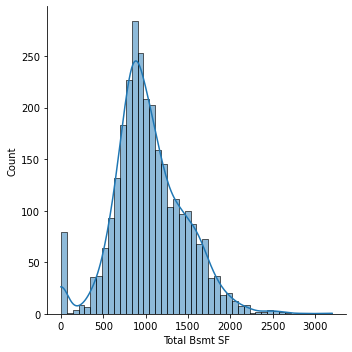

In [20]:
sns.displot(data=df,x='Total Bsmt SF',kde=True)

<AxesSubplot:xlabel='Total Bsmt SF'>

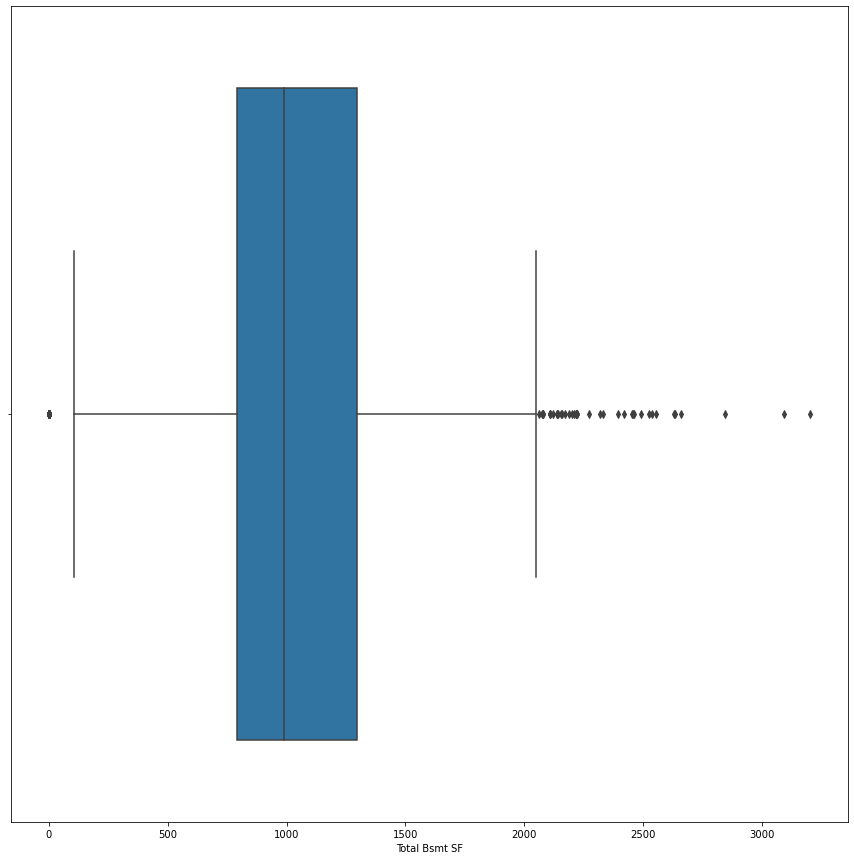

In [21]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Total Bsmt SF',whis=1.5)

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

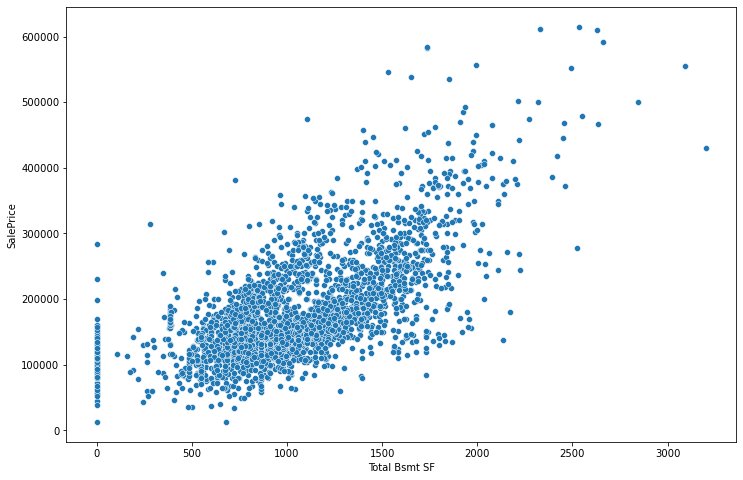

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Total Bsmt SF',y='SalePrice',data=df)

In [23]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


Feature : First Floor square feet

In [24]:
df[(df['1st Flr SF']>3000) & (df['SalePrice']<300000)].index

Int64Index([1497], dtype='int64')

In [25]:
df[(df['1st Flr SF']>3000) & (df['SalePrice']>400000)].index

Int64Index([1772], dtype='int64')

In [26]:
df.drop([1497,1772],axis=0,inplace=True)

<AxesSubplot:xlabel='1st Flr SF', ylabel='SalePrice'>

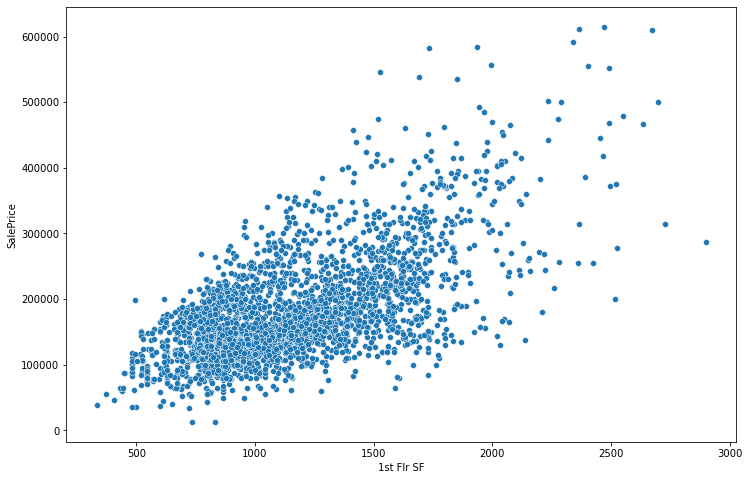

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='1st Flr SF',y='SalePrice',data=df)

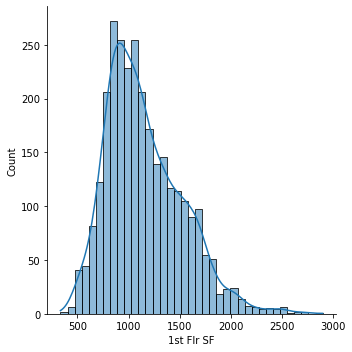

In [28]:
sns.displot(data=df,x='1st Flr SF',kde=True)

<AxesSubplot:xlabel='1st Flr SF'>

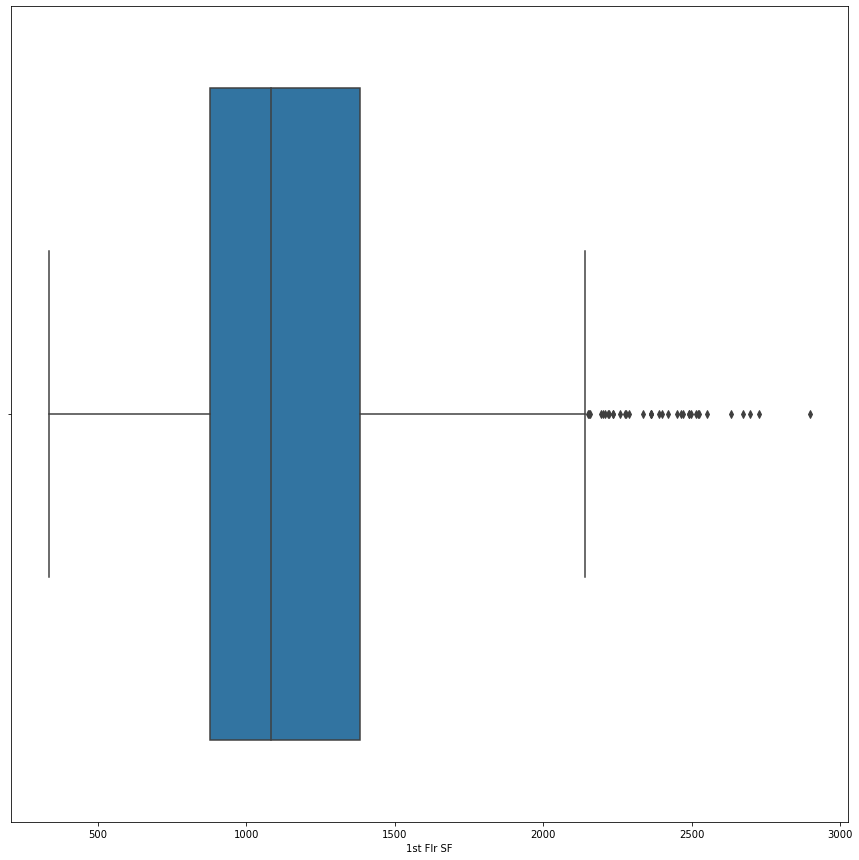

In [29]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='1st Flr SF',whis=1.5)

In [30]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


Feature : Year garage was built

In [31]:
df[(df['Garage Yr Blt']>2200) & (df['SalePrice']<300000)].index

Int64Index([2260], dtype='int64')

<AxesSubplot:xlabel='Garage Yr Blt', ylabel='SalePrice'>

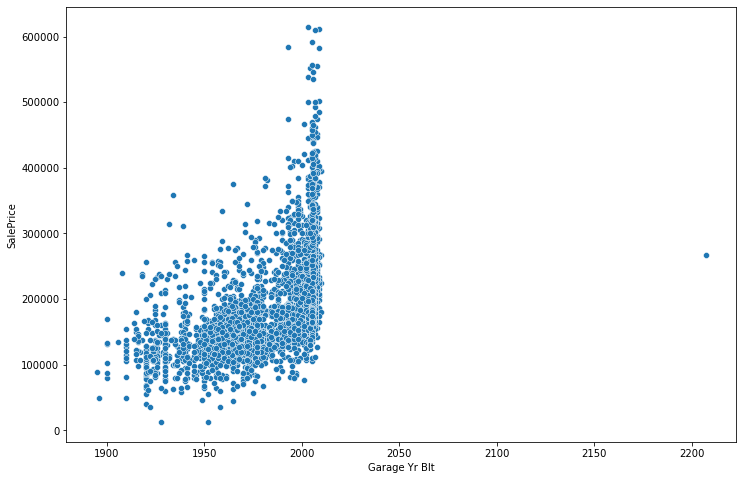

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Yr Blt',y='SalePrice',data=df)

In [33]:
df.drop([2260],axis=0,inplace=True)

<AxesSubplot:xlabel='Garage Yr Blt', ylabel='SalePrice'>

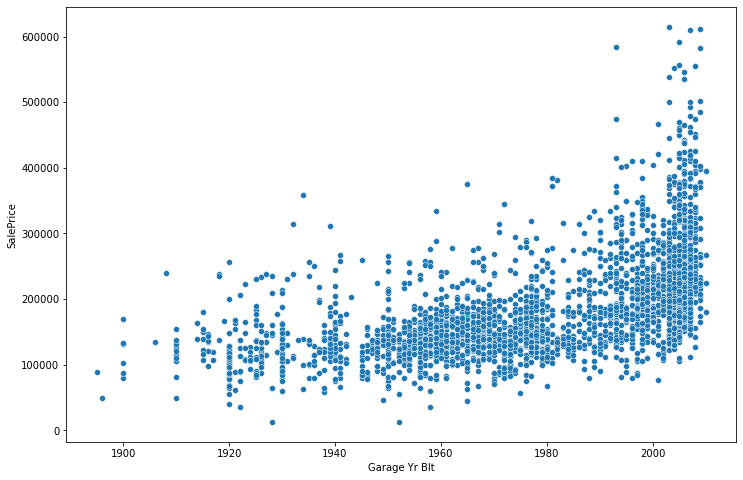

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Yr Blt',y='SalePrice',data=df)

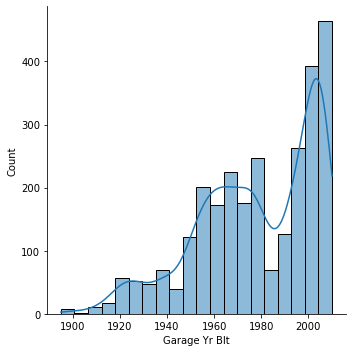

In [35]:
sns.displot(data=df,x='Garage Yr Blt',kde=True)

<AxesSubplot:xlabel='Garage Yr Blt'>

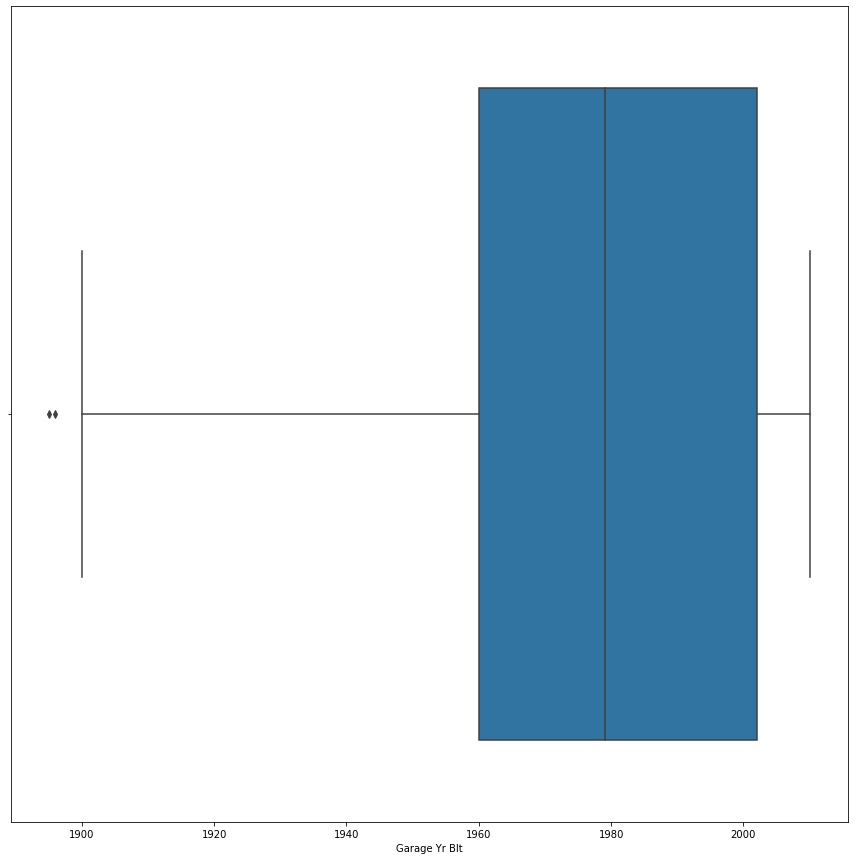

In [36]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Garage Yr Blt',whis=1.5)

In [37]:
df[(df['Garage Yr Blt']<1900)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
307,C (all),Grvl,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,...,330.0,TA,TA,N,NaN,NaN,NaN,WD,Alloca,50138
1554,C (all),Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,...,185.0,Fa,TA,Y,NaN,NaN,NaN,WD,Normal,89000


In [38]:
df.drop([307,1554],axis=0,inplace=True)

<AxesSubplot:xlabel='Garage Yr Blt'>

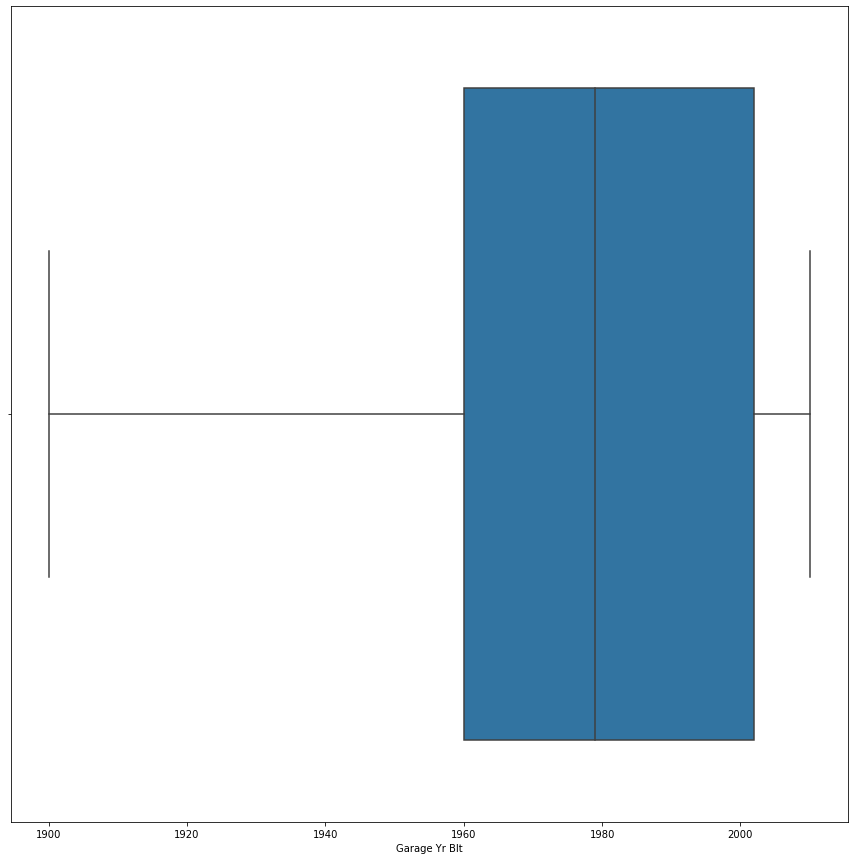

In [39]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Garage Yr Blt',whis=1.5)

In [40]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


Feature : Above grade (ground) living area square feet

<AxesSubplot:xlabel='Gr Liv Area'>

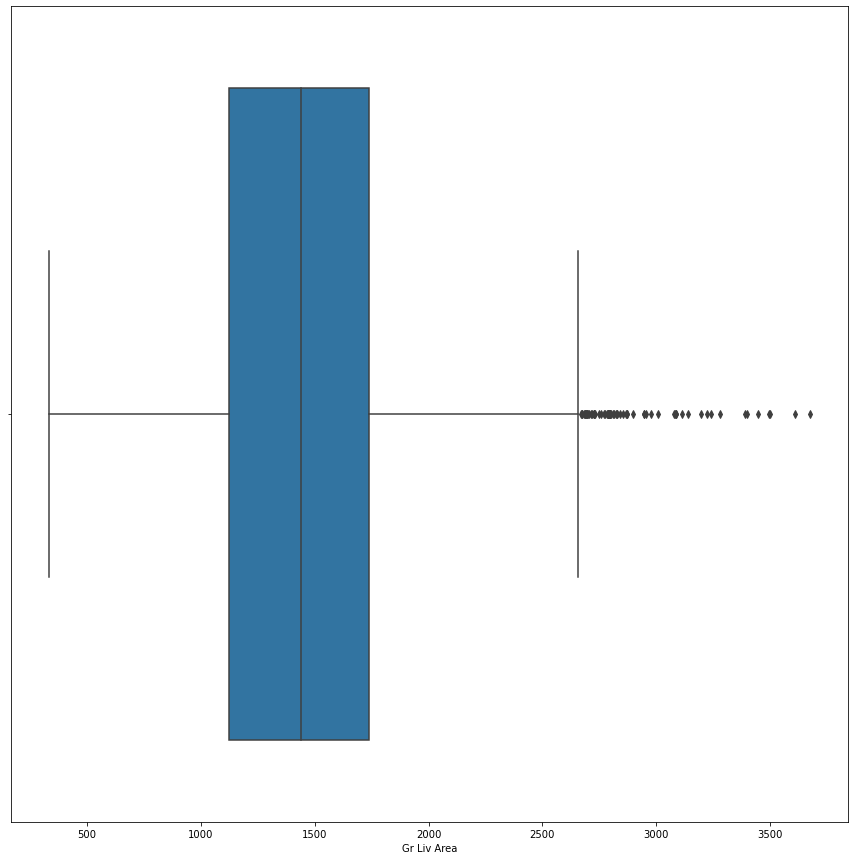

In [41]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Gr Liv Area',whis=1.5)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

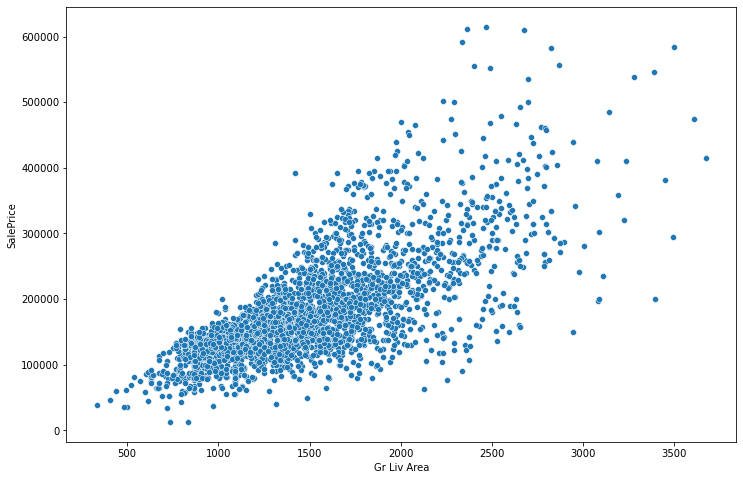

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

Feature : Remodel date (same as construction date if no remodeling or additions)

<AxesSubplot:xlabel='Year Remod/Add', ylabel='SalePrice'>

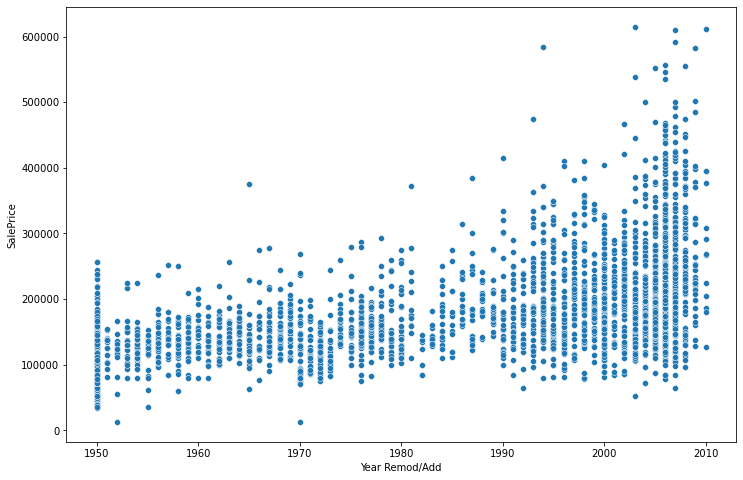

In [43]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Remod/Add',y='SalePrice',data=df)

In [44]:
df[(df['Year Remod/Add']<1975) & (df['SalePrice']<20000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
181,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,780.0,Fa,Fa,N,NaN,NaN,NaN,WD,Abnorml,12789
1553,A (agr),Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,...,487.0,Fa,Po,N,NaN,NaN,NaN,WD,Abnorml,13100


In [45]:
df[(df['Year Remod/Add']<1970) & (df['SalePrice']>300000)].index

Int64Index([956], dtype='int64')

In [46]:
df[(df['Year Remod/Add']<1985) & (df['SalePrice']>300000)].index

Int64Index([956, 1860], dtype='int64')

In [47]:
df.drop([181,1553,956,1860],axis=0,inplace=True)

<AxesSubplot:xlabel='Year Remod/Add', ylabel='SalePrice'>

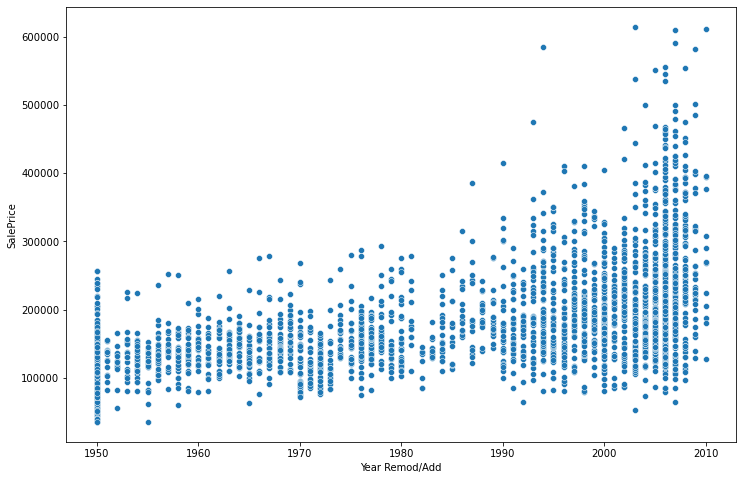

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Remod/Add',y='SalePrice',data=df)

<AxesSubplot:xlabel='Year Remod/Add'>

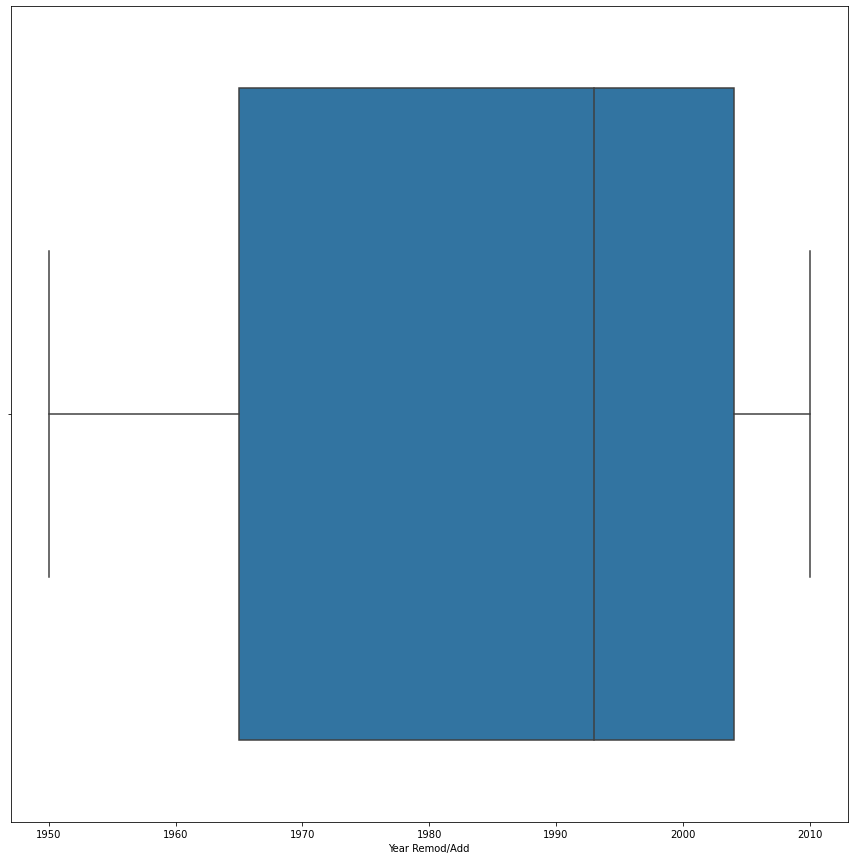

In [49]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Year Remod/Add',whis=1.5)

In [50]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


Feature : Size of garage in square feet

<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

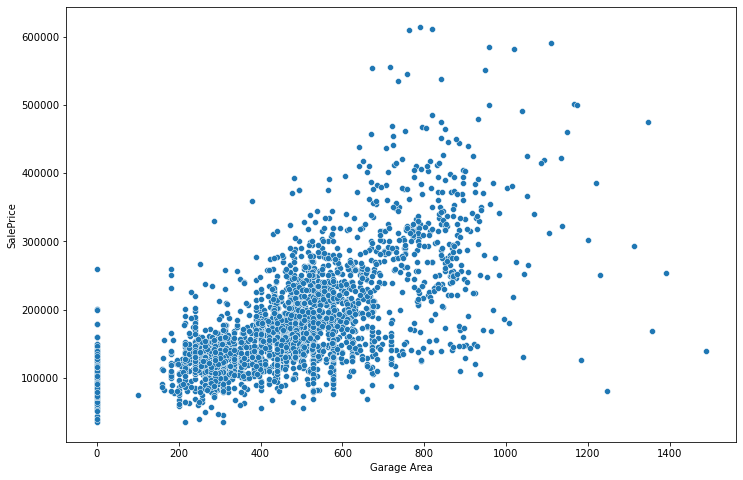

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Area',y='SalePrice',data=df)

In [52]:
df[(df['Garage Area']==0) & (df['SalePrice']>200000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
1407,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,0.0,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal,260000
2045,RL,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,ClearCr,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,NaN,WD,Normal,200500


In [53]:
df[(df['Garage Area']>1100) & (df['SalePrice']<200000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
746,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,...,1184.0,Fa,TA,P,NaN,NaN,NaN,WD,Normal,126500
1258,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,1488.0,Fa,TA,N,NaN,GdWo,NaN,WD,Normal,139000
1557,C (all),Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,...,1248.0,TA,TA,Y,NaN,NaN,Shed,ConLD,Normal,81000
2282,RL,Pave,NaN,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,...,1356.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,168000


In [54]:
df.drop([746,1258,1557,2282,1407],axis=0,inplace=True)

<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

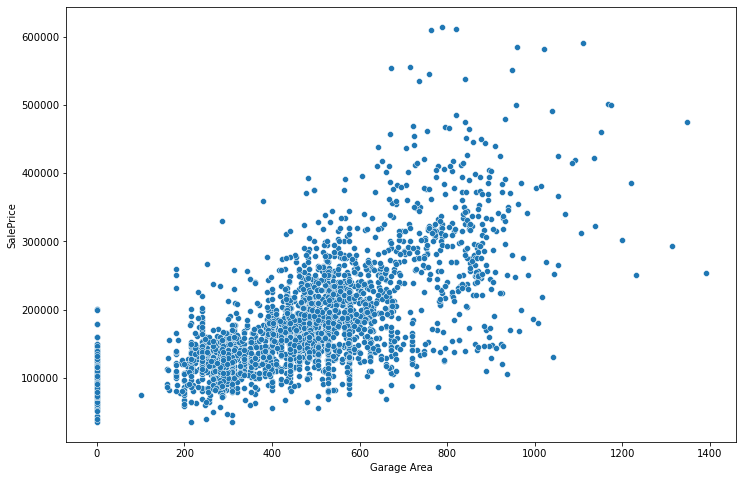

In [55]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Area',y='SalePrice',data=df)

<AxesSubplot:xlabel='Garage Area'>

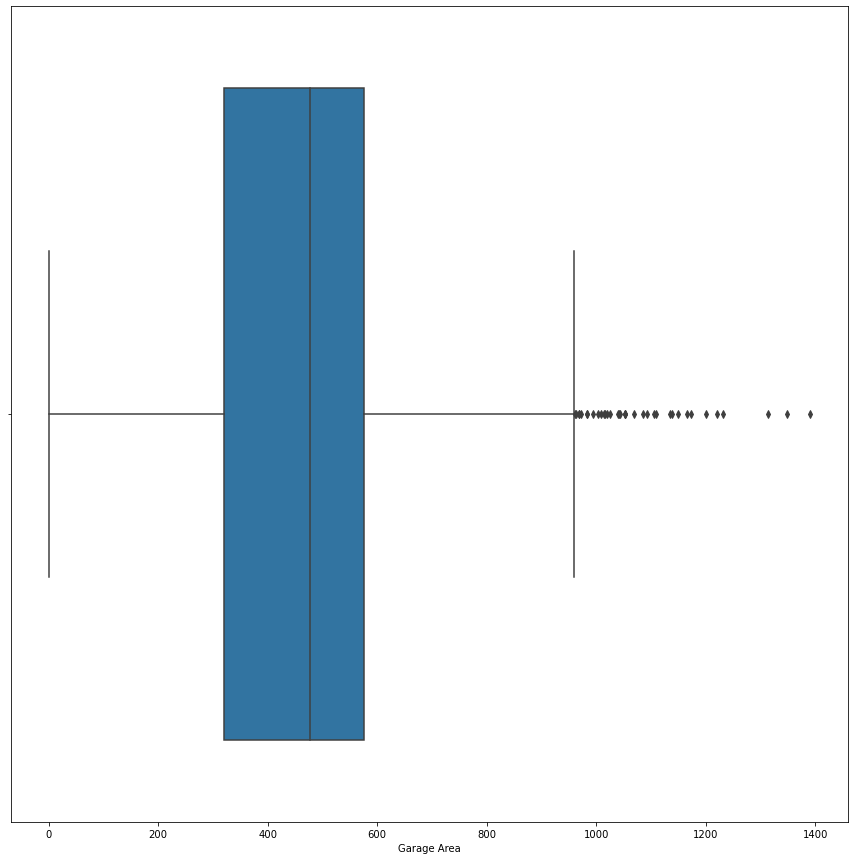

In [56]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Garage Area',whis=1.5)

In [57]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


Feature : Size of garage in car capacity

<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

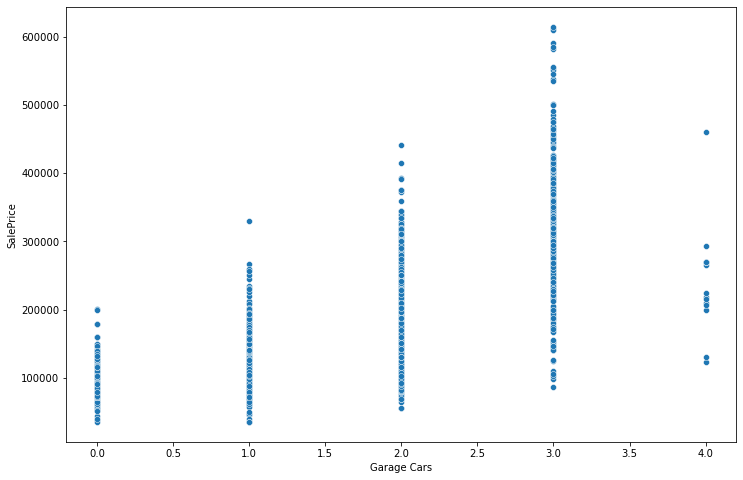

In [58]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Garage Cars',y='SalePrice',data=df)

<AxesSubplot:xlabel='Garage Cars'>

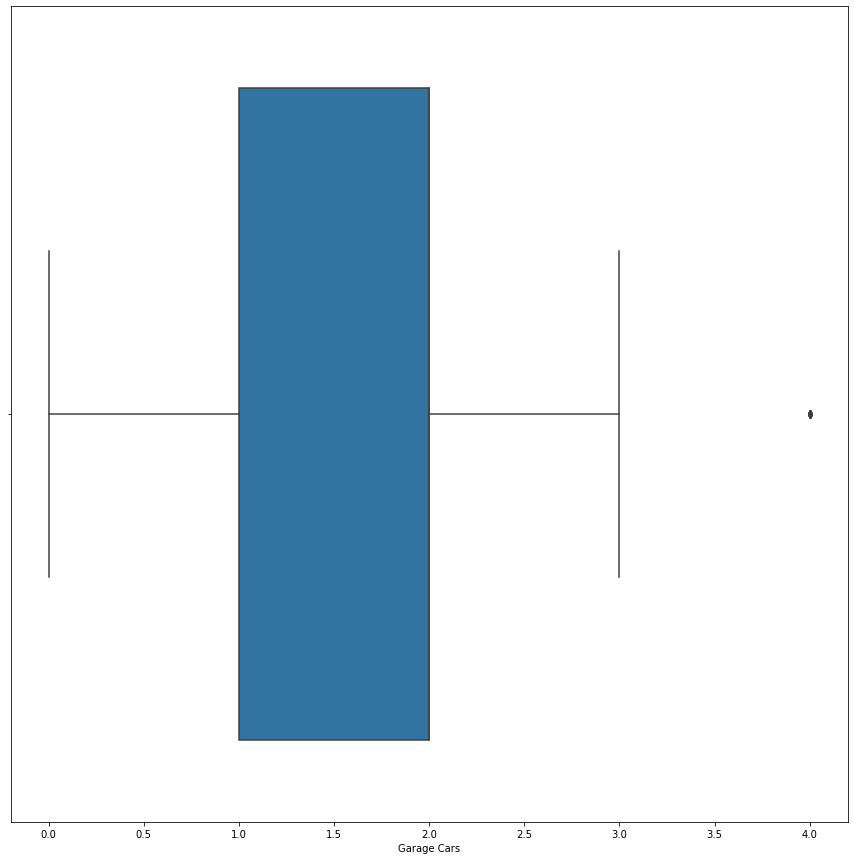

In [59]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Garage Cars',whis=1.5)

In [60]:
df[(df['Garage Cars']>3.5)].index

Int64Index([246, 669, 716, 815, 816, 817, 1027, 1059, 1588, 1589, 1668, 2278,
            2749, 2904],
           dtype='int64')

In [61]:
df.drop([246, 669, 716, 815, 816, 817, 1027, 1059, 1588, 1589, 1668, 2278,2749, 2904],axis=0,inplace=True)

<AxesSubplot:xlabel='Garage Cars'>

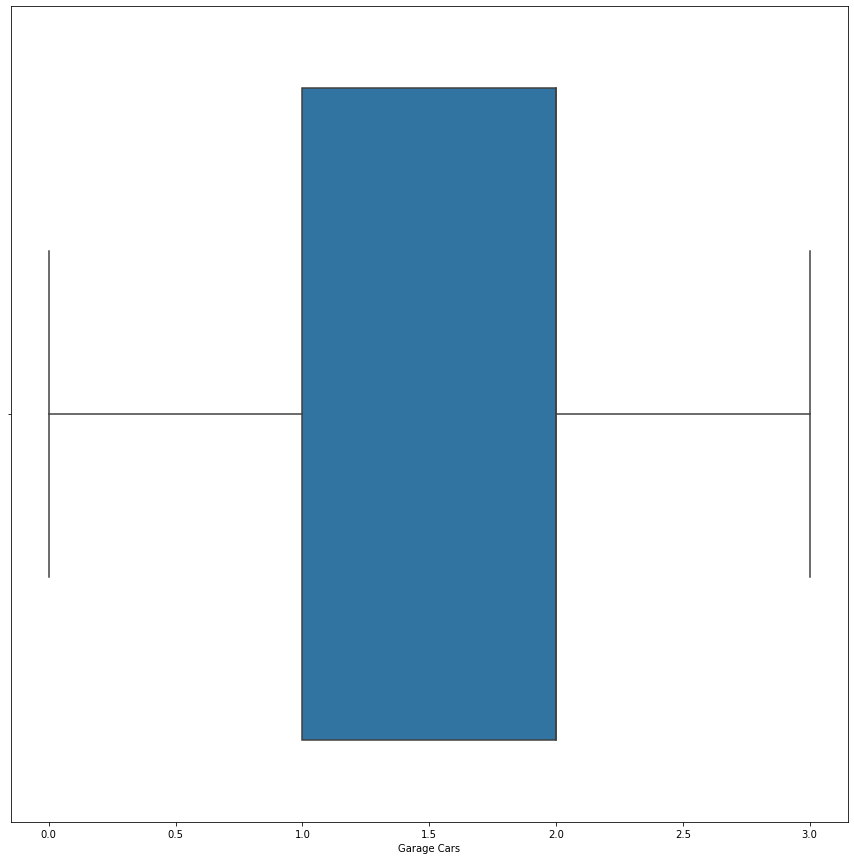

In [62]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Garage Cars',whis=1.5)

In [63]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


Feature : Fireplaces

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

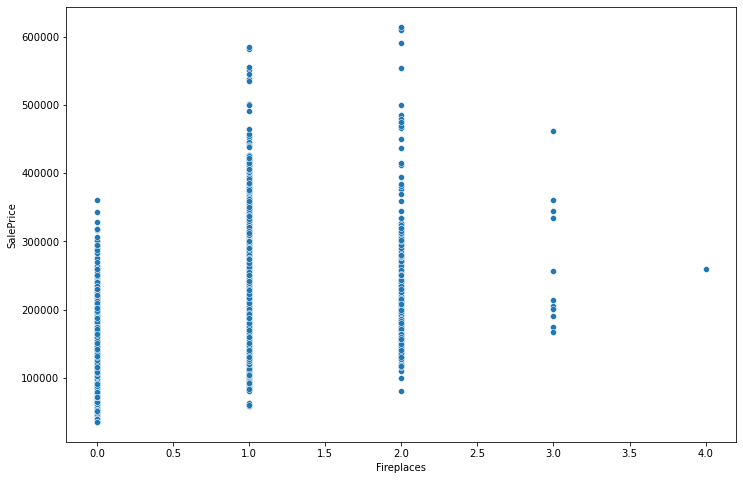

In [64]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Fireplaces',y='SalePrice',data=df)

<AxesSubplot:xlabel='Fireplaces'>

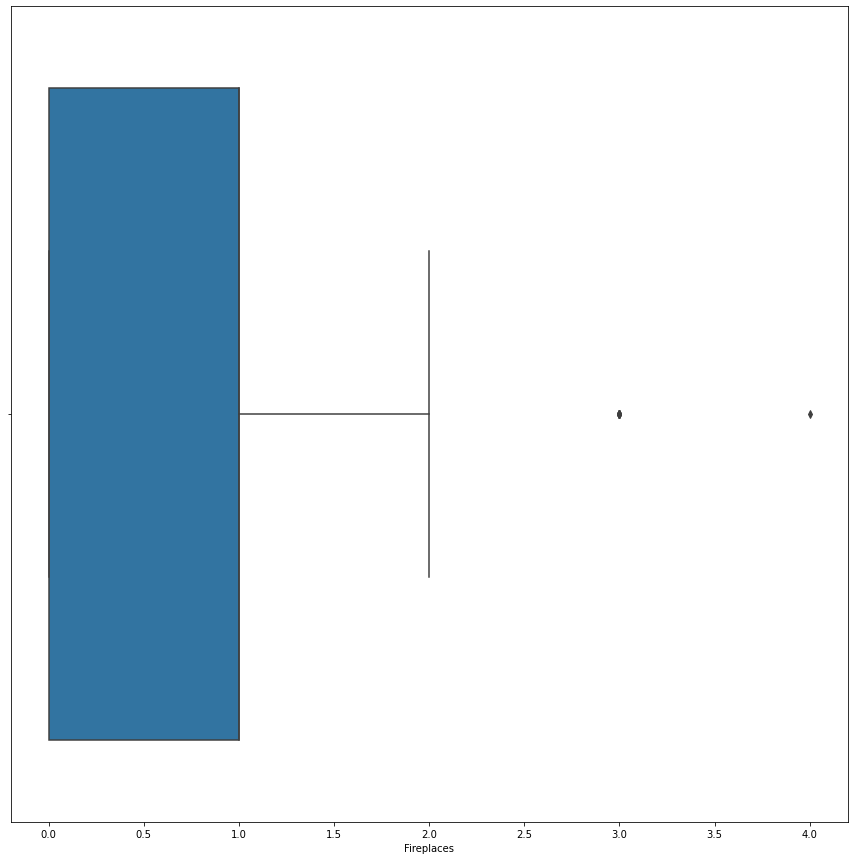

In [65]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Fireplaces',whis=1.5)

In [66]:
df[(df['Fireplaces']>2.5)].index

Int64Index([343, 421, 626, 785, 1924, 2223, 2395, 2498, 2500, 2518, 2590,
            2869],
           dtype='int64')

In [67]:
df.drop([343, 421, 626, 785, 1924, 2223, 2395, 2498, 2500, 2518, 2590,2869],axis=0,inplace=True)

<AxesSubplot:xlabel='Fireplaces'>

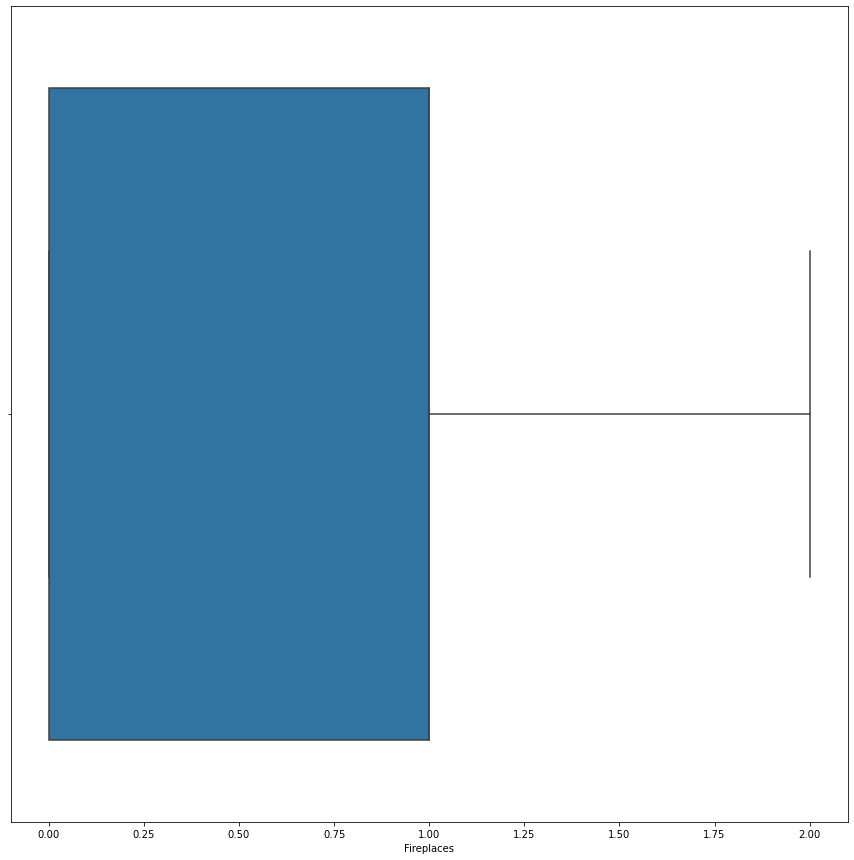

In [68]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Fireplaces',whis=1.5)

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

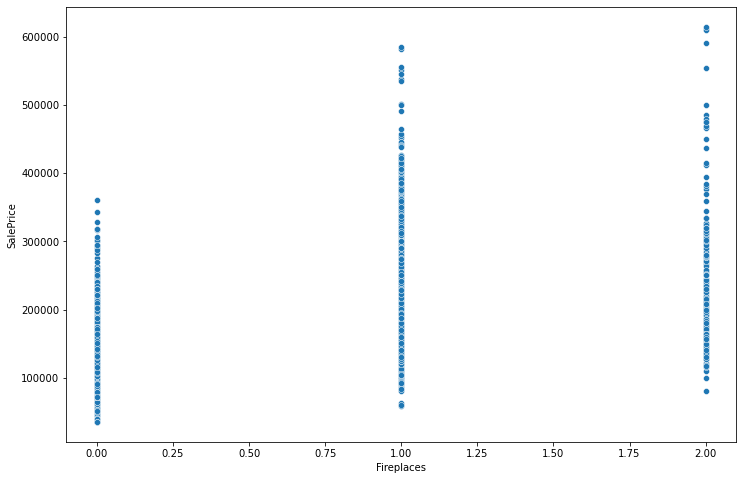

In [69]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Fireplaces',y='SalePrice',data=df)

In [70]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


Feature : Total rooms above grade (does not include bathrooms)

<AxesSubplot:xlabel='TotRms AbvGrd', ylabel='SalePrice'>

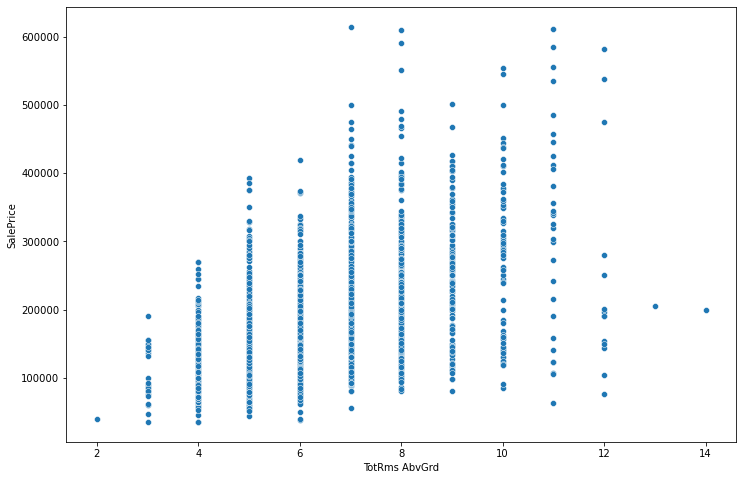

In [71]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='TotRms AbvGrd',y='SalePrice',data=df)

<AxesSubplot:xlabel='TotRms AbvGrd'>

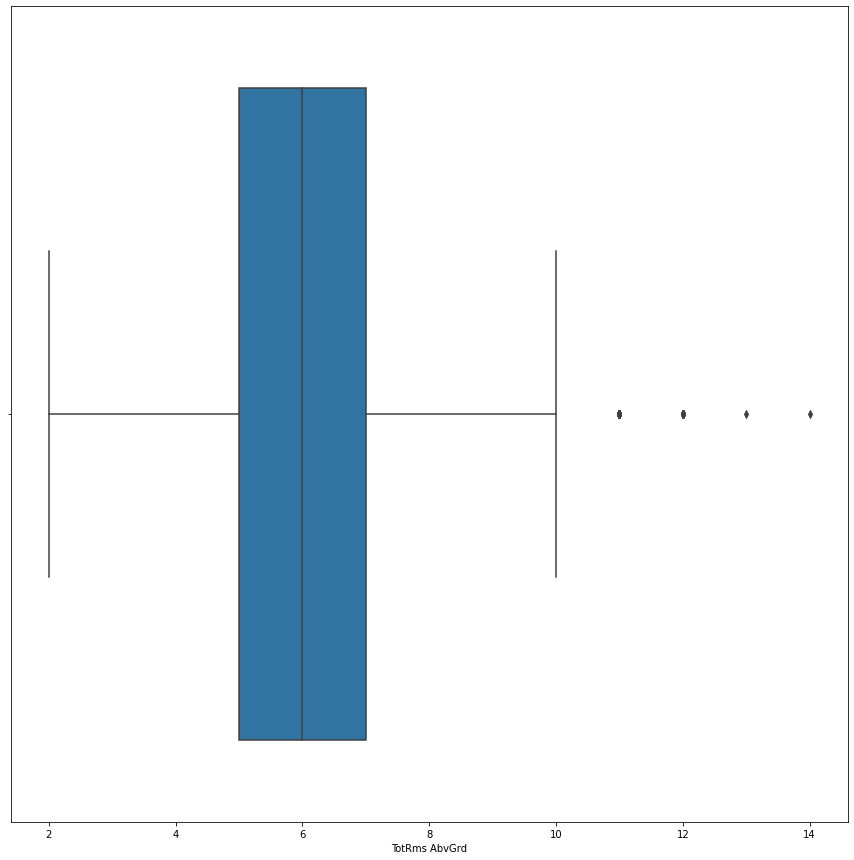

In [72]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='TotRms AbvGrd',whis=1.5)

In [73]:
df[(df['TotRms AbvGrd']>12)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
925,RL,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,Crawfor,Norm,...,400.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,205000
2194,RH,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,...,0.0,NaN,NaN,N,NaN,NaN,NaN,WD,Abnorml,200000


In [74]:
df.drop([925,2194],axis=0,inplace=True)

<AxesSubplot:xlabel='TotRms AbvGrd'>

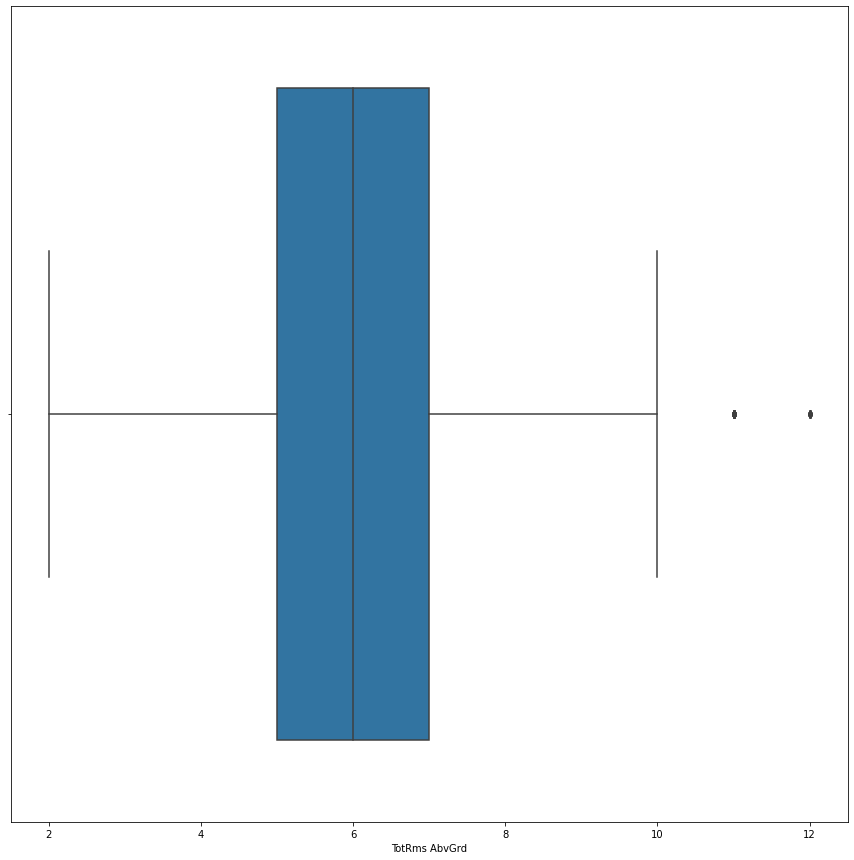

In [75]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='TotRms AbvGrd',whis=1.5)

In [76]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


Feature : Rates the overall material and finish of the house

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

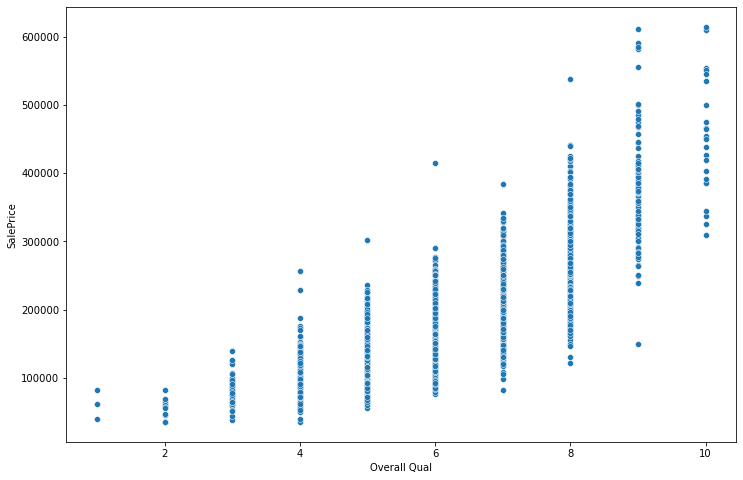

In [77]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

<AxesSubplot:xlabel='Overall Qual'>

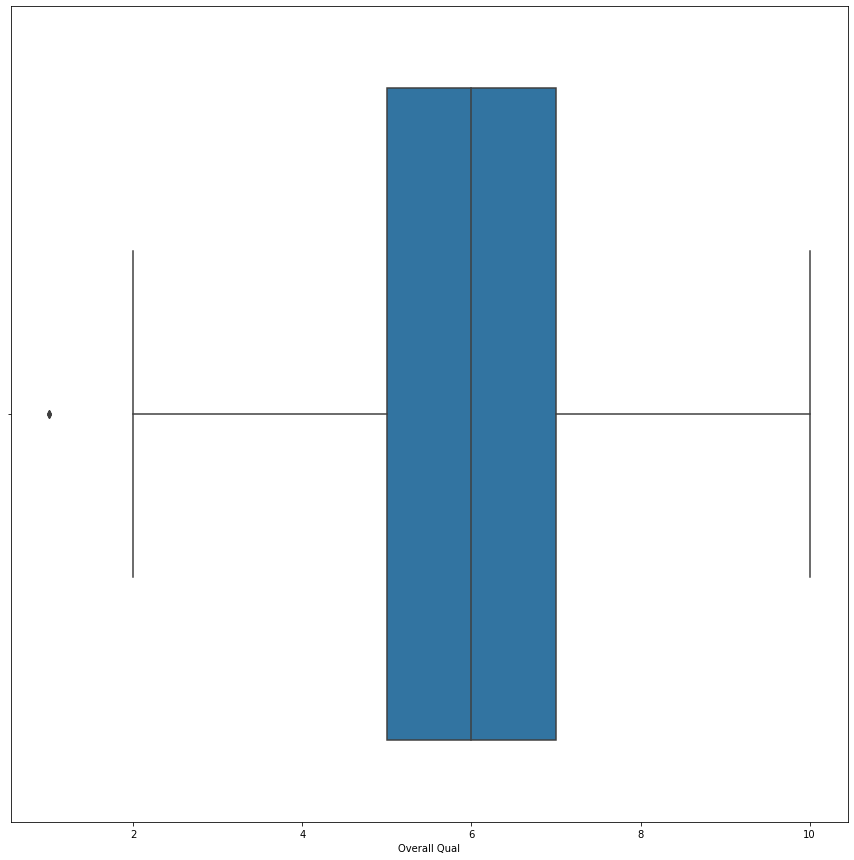

In [78]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Overall Qual',whis=1.5)

In [79]:
df[(df['Overall Qual']<2)].index

Int64Index([765, 1901, 2903], dtype='int64')

In [80]:
df.drop([765, 1901, 2903],axis=0,inplace=True)

<AxesSubplot:xlabel='Overall Qual'>

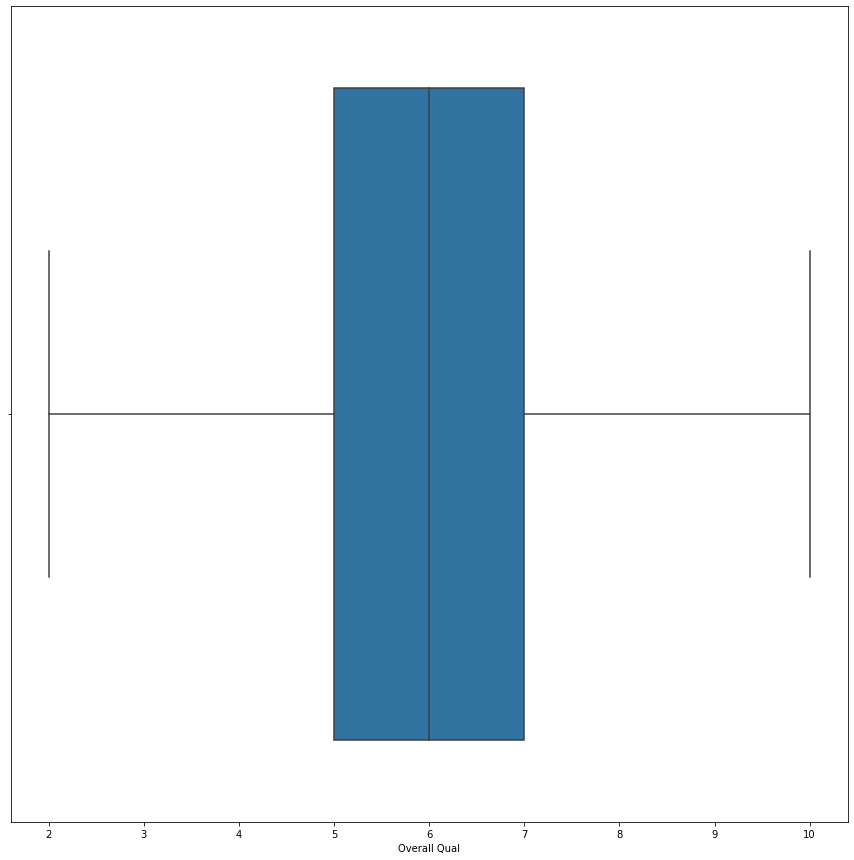

In [81]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Overall Qual',whis=1.5)

In [82]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


Feature : Original construction date

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

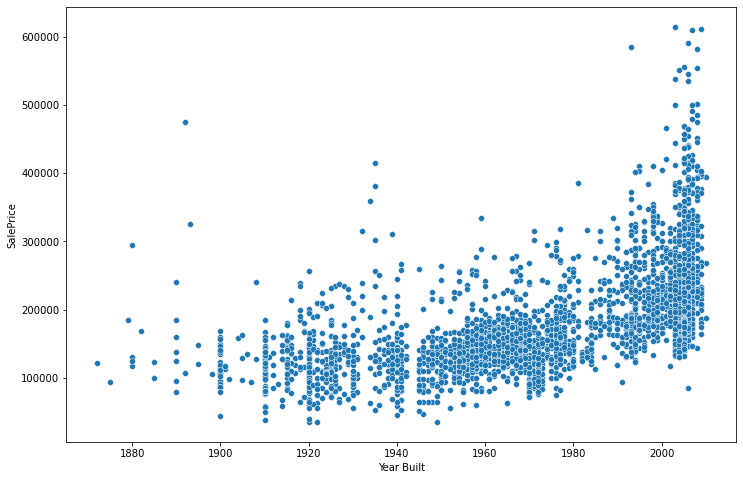

In [83]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Built',y='SalePrice',data=df)

<AxesSubplot:xlabel='Year Built'>

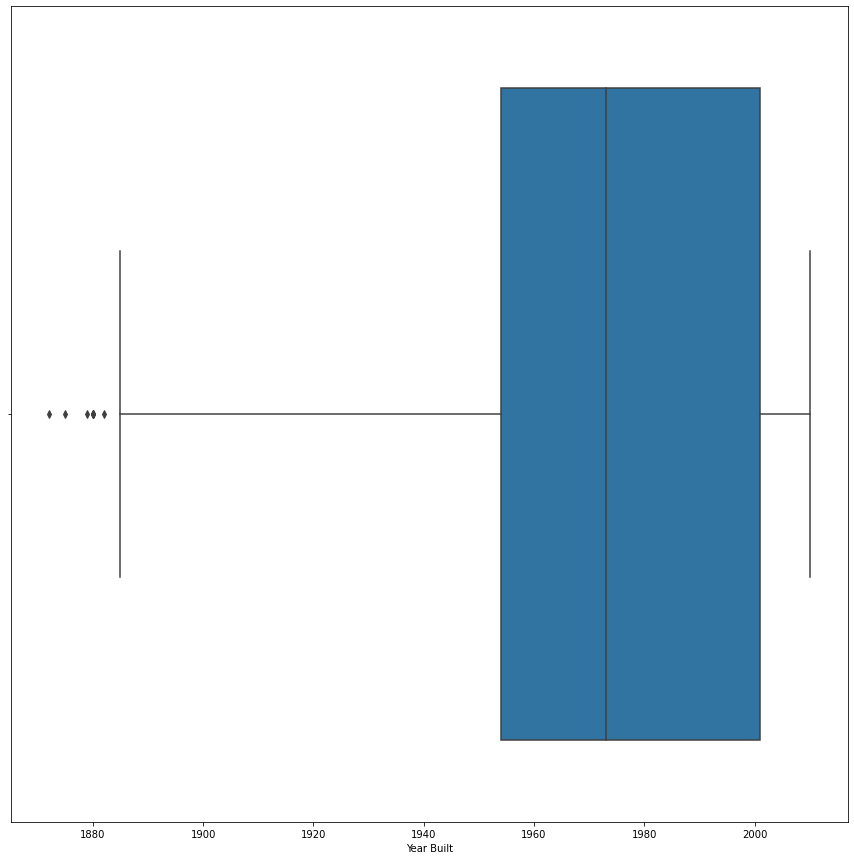

In [84]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Year Built',whis=1.5)

In [85]:
df[(df['Year Built']<1900) & (df['SalePrice']>200000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
185,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,624.0,TA,TA,N,NaN,NaN,NaN,WD,Normal,240000
1306,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,870.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,295000
1320,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,880.0,Gd,TA,Y,NaN,NaN,NaN,WD,Normal,325000
2666,RM,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,840.0,Ex,TA,Y,NaN,GdPrv,NaN,WD,Normal,475000


In [86]:
df[(df['Year Built']>2000) & (df['SalePrice']<100000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
2907,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,NaN,NaN,WD,Abnorml,84500


In [87]:
df.drop([185,1306,1320,2666,2907],axis=0,inplace=True)

<AxesSubplot:xlabel='Year Built'>

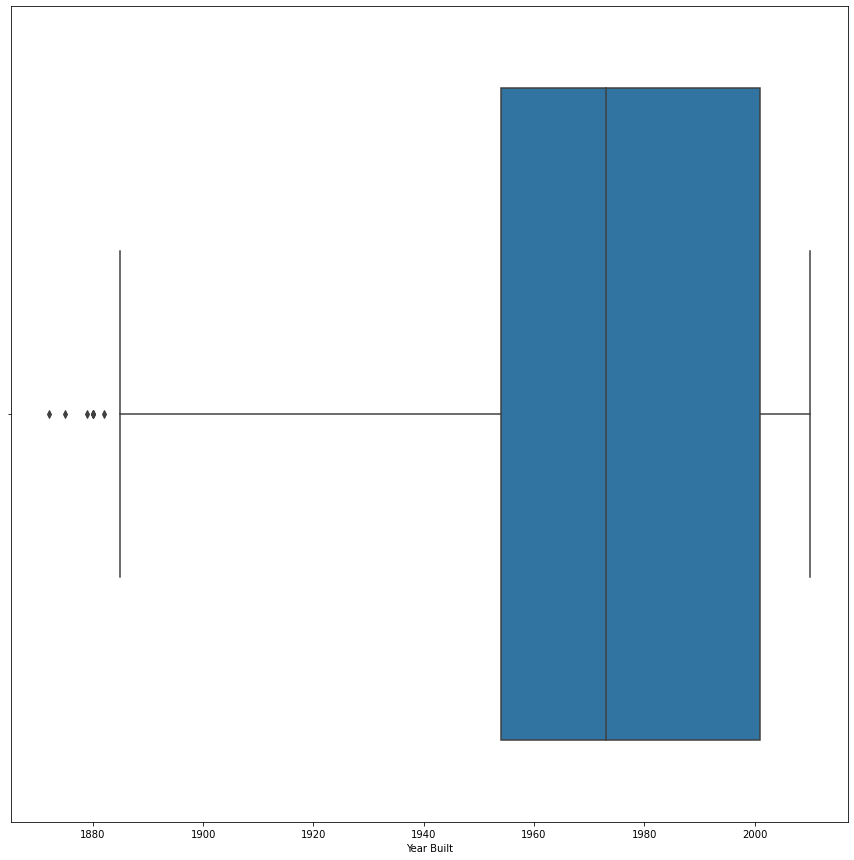

In [88]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Year Built',whis=1.5)

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

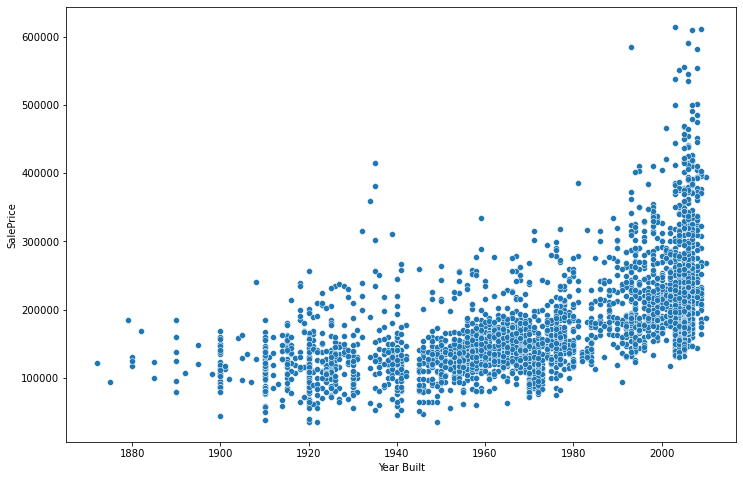

In [89]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year Built',y='SalePrice',data=df)

In [90]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


Feature : Full bathrooms above grade

<AxesSubplot:xlabel='Full Bath', ylabel='SalePrice'>

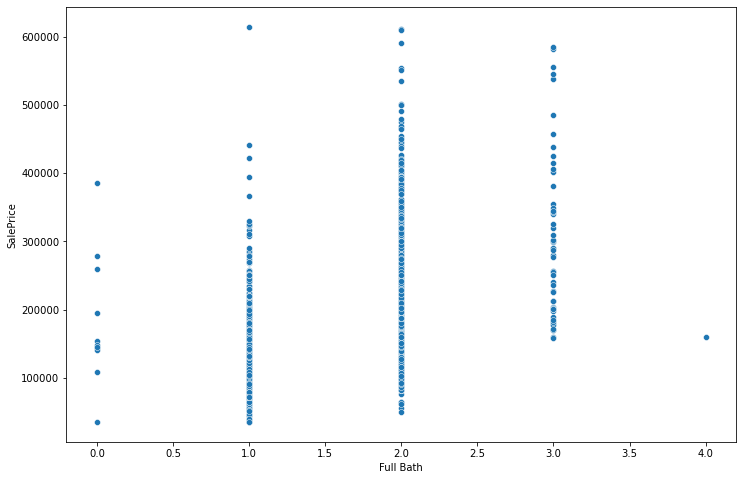

In [91]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Full Bath',y='SalePrice',data=df)

<AxesSubplot:xlabel='Full Bath'>

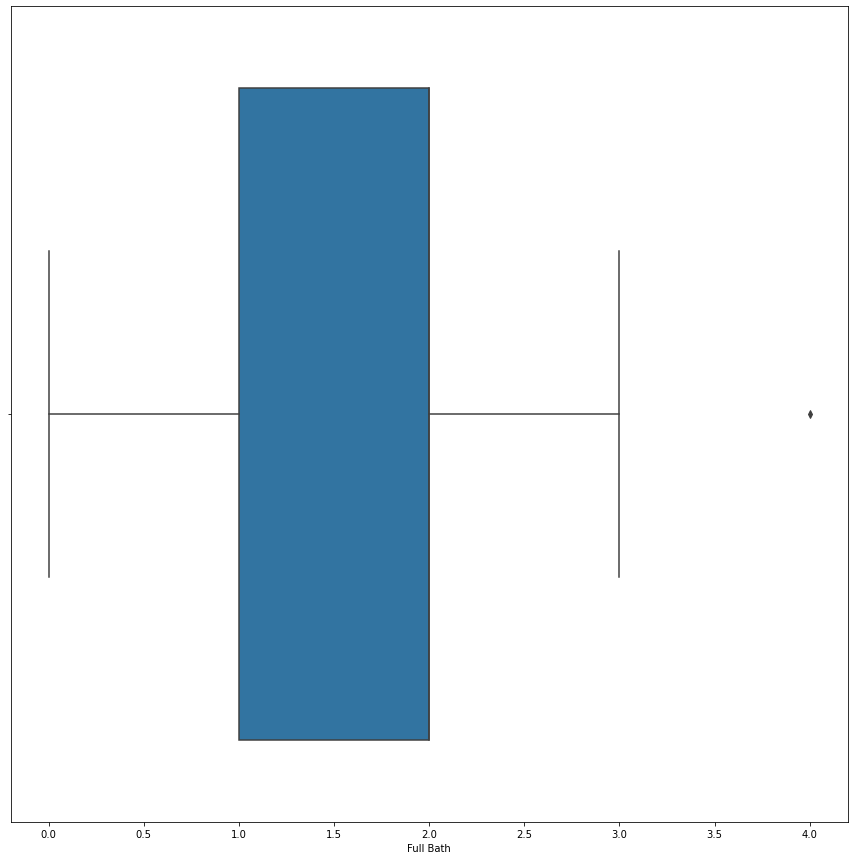

In [92]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Full Bath',whis=1.5)

In [93]:
df[(df['Full Bath']==4)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
336,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,616.0,TA,Fa,Y,NaN,NaN,Shed,WD,Normal,159000


In [94]:
df[(df['Full Bath']==1) & (df['SalePrice']>600000)]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
1063,RL,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,...,789.0,TA,TA,Y,Ex,NaN,NaN,WD,Normal,615000


In [95]:
df.drop([1063,336],axis=0,inplace=True)

<AxesSubplot:xlabel='Full Bath'>

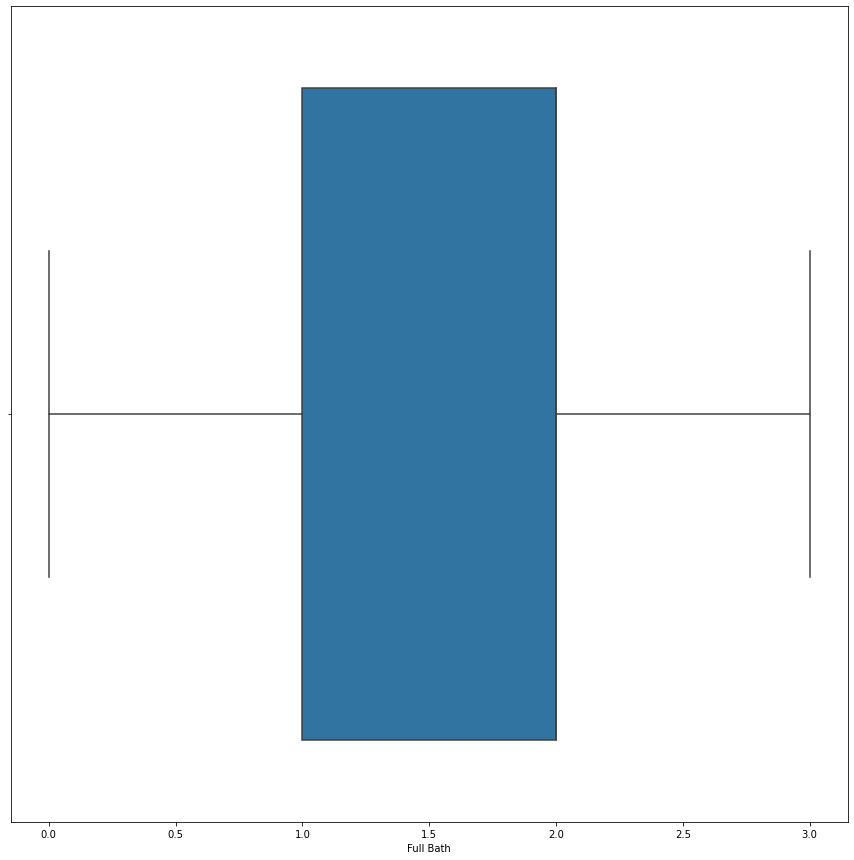

In [96]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='Full Bath',whis=1.5)

In [97]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


**Removing Sale Price more than 550000**

In [98]:
df[df['SalePrice']>480000].index

Int64Index([  15,   44,   46,  366,  422,  423,  432,  433,  456, 1637, 1691,
            1701, 2330, 2332, 2334, 2450],
           dtype='int64')

In [99]:
df.drop([15,44,46,366,422,423,432,433,456, 1637, 1691,1701, 2330, 2332, 2334, 2450],axis=0,inplace=True)

<AxesSubplot:xlabel='SalePrice'>

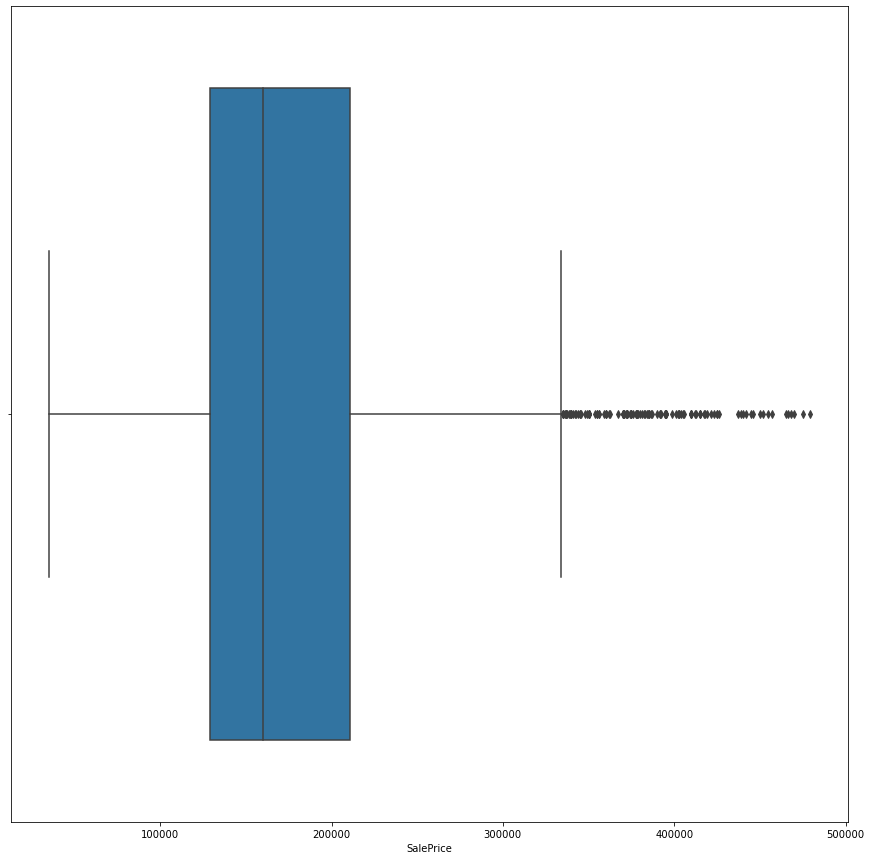

In [100]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='SalePrice',whis=1.5)

In [101]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


In [102]:
df

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,528.0,TA,TA,P,NaN,NaN,NaN,WD,Normal,215000
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,730.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,105000
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,312.0,TA,TA,Y,NaN,NaN,Gar2,WD,Normal,172000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,522.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,244000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,482.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,588.0,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal,142500
2926,RL,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,484.0,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,131000
2927,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0.0,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal,132000
2928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,418.0,TA,TA,Y,NaN,NaN,NaN,WD,Normal,170000


In [103]:
df.to_csv(r'C:\Users\Acer\Ames Housing Data No Outlier.csv',index=False)